# Feature Manipulation in Pandas

Here let's look at a different dataset that will allow us to really dive into some meaningful visualizations. This data set is publically available, but it is also part of a Kaggle competition.

You can get the data from here: https://www.kaggle.com/c/titanic-gettingStarted or you can use the code below to load the data from GitHub.

There are lots of iPython notebooks for looking at the Titanic data. Check them out and see if you like any better than this one!

When going through visualization options, I recommend the following steps:
- Would you like the visual to be interactive?
  - Yes, Does it have a lot of data?
    - No, Use plotly or bokeh
    - Yes, sub-sample and then use plotly/bokeh
    - Yes, think about using Turi for large data
  - No, Does seaborn have a built-in function for plotting?
    - Yes, use seaborn
    - No, Does Pandas support the visual?
      - Yes, use pandas
      - No, use low level matplotlib
      
Look at various high level plotting libraries like:
- Altair (https://altair-viz.github.io)
- Bokeh (http://bokeh.pydata.org/en/latest/)
- And many others...

## Adding Dependencies (for Jupyter Lab)
- `conda install -c conda-forge missingno`
- `conda install nodejs`
- `jupyter labextension install @jupyterlab/plotly-extension`

# Loading the Titanic Data for Example Visualizations

In [1]:
# load the Titanic dataset
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv') # read in the csv file

df.head()

Pandas: 2.1.4
Numpy: 1.26.3


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# note that the describe function defaults to using only some variables
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
print(df.dtypes)
print('===========')
print(df.info())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2

## Questions we might want to ask:
- What percentage of passengers survived the Titanic disaster?
- What percentage survived in each class (first, coach, etc.)?
- How many people traveled in each class? How many classes are there?



In [4]:
# the percentage of individuals that survived on the titanic
sum(df.Survived==1)/len(df)*100.0

38.38383838383838

## Grouping the Data

In [6]:
# Lets aggregate by class and count survival rates
df_grouped = df.groupby(by='Pclass')

for p_class,p_class_data in df_grouped:
    print(f'There were {len(p_class_data)} people traveling in {p_class} class.')
    print(f'In {p_class} class, the overall percentage of individuals that survived was {sum(p_class_data.Survived==1)/len(df)*100}')
    print(f'In {p_class} class, the percentage of {p_class} individuals that survived was {sum(p_class_data.Survived==1)/len(p_class_data)*100}')
    print('---------------------------------------')

There were 216 people traveling in 1 class.
In 1 class, the overall percentage of individuals that survived was 15.26374859708193
In 1 class, the percentage of 1 individuals that survived was 62.96296296296296
---------------------------------------
There were 184 people traveling in 2 class.
In 2 class, the overall percentage of individuals that survived was 9.764309764309765
In 2 class, the percentage of 2 individuals that survived was 47.28260869565217
---------------------------------------
There were 491 people traveling in 3 class.
In 3 class, the overall percentage of individuals that survived was 13.35578002244669
In 3 class, the percentage of 3 individuals that survived was 24.236252545824847
---------------------------------------


In [7]:
# an example of using the groupby function with a data column
number_of_survivors_per_class = df_grouped['Survived'].sum()
print(df_grouped['Survived'].sum())
print(number_of_survivors_per_class)
print('---------------------------------------')
class_size = df_grouped.PassengerId.count()
print(df_grouped.Survived.count())
print(class_size)
print('---------------------------------------')
percentage_of_survivors_per_class = number_of_survivors_per_class / class_size
print(df_grouped.Survived.sum() / df_grouped.Survived.count())
print(percentage_of_survivors_per_class)

# might there be a better way of displaying this data?

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
---------------------------------------
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64
---------------------------------------
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


Class Exercise 📝: 

In [8]:
'''
Accuracy of Survival Rates: The standard error here helps you understand how accurate the average survival rate is for each class. 
Confidence in Estimates: When you say "X% of first-class passengers survived," the standard error helps you determine how confident you can be in this percentage. 
Comparing Survival Rates Across Classes: If you're comparing survival rates between different classes, the standard error can help you determine if the differences you see are significant or just due to random chance. 
'''

print(df_grouped.Survived.std() / np.sqrt(df_grouped.Survived.count()))
print('---------------------------------------')
print(df_grouped.Survived.std() / np.sqrt(class_size))

Pclass
1    0.032934
2    0.036906
3    0.019358
Name: Survived, dtype: float64
---------------------------------------
Pclass
1    0.032934
2    0.036906
3    0.019358
dtype: float64


___________
# Cleaning the Dataset
Let's start by visualizing some of the missing data in this dataset. We will use the `missingno` package to help visualize where the data contains `NaNs`. This is a great tool for looking at nan values and how we might go about filling in the values. 

For this visualization, we can use a visualization library called `missingno` that hs many types of visuals for looking at missing data in a dataframe. I particularly like the `matrix` visualization, but there are many more to explore:
- https://github.com/ResidentMario/missingno

### Plot Type One: Filter Bar

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

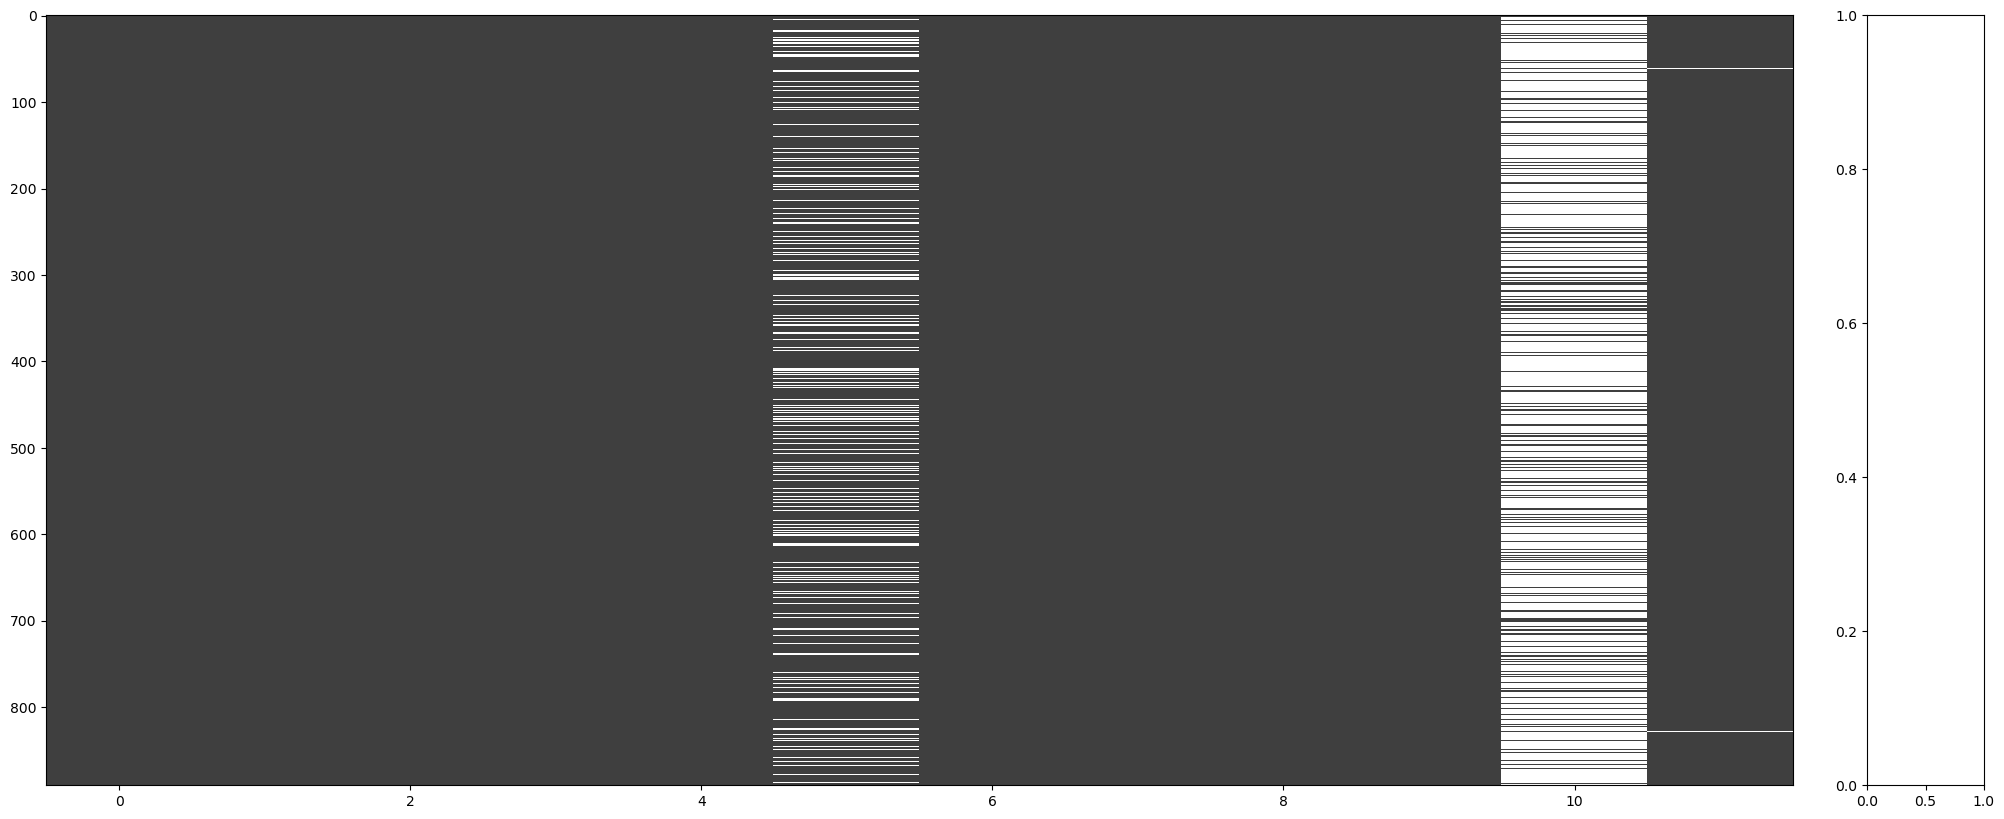

In [9]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

# plt.figure()
# mn.matrix(df.sort_values(by=["Cabin","Age"]))
# plt.title("Sorted",fontsize=22)
# plt.show()

In [10]:
# let's clean the dataset a little before moving on

# 1. Remove attributes that just arent useful for us
for col in ['PassengerId','Name','Cabin','Ticket']:
    if col in df:
        del df[col]
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Imputation Techniques 
Let's compare two different techniques from lecture on how to fill in missing data. Recall that imputation should be done with a great deal of caution. Here, the Age variable seems to be missing about 15% of the values. That might be too many to impute. Let's try two methods of imputation on the Age variable: 
- Split-Imput-Combine (SIC)
- K-Nearest Neighbor Imputation (KNN)

**Self Test ML2a.0** 
What is a difference between the Split-Impute-Combine (SIC) Technique and the K-Nearest Neighbor (KNN) Imputation Technique:
- A. SIC imputes values based on distances, KNN does not
- B. SIC uses discrete groupings of instances, KNN does not
- C. KNN does not use statistics like median, mode, or mean to fill in values, SIC does
- D. There is no difference in the two techniques 

### Split-Impute-Combine in Pandas

In [14]:
# This code is for split, impute, combine
#     let's clean the dataset a little before moving on


# Impute some missing values, grouped by their Pclass and SibSp numbers, 
# then use this grouping to fill the data set in each group, then transform back

''' Grouping by 'Pclass', 'SibSp', and 'Parch':
WHAT 
-- create separate groups of data based on unique combinations of these three columns. 
-- to impute (fill in) missing values within these groups separately.
WHY 
-- Improved Imputation Accuracy
-- Avoiding Bias
-- Customized Imputation Strategies
-- Improved Interpretability
HOW
-- Grouping by related characteristics to target variable
'''
df_grouped = df.groupby(by=['Pclass','SibSp','Parch']) # perform the grouping of thing related to 'age'


''' imputation of numeric columns
WHAT 
-- within each group, replace missing values with the mean (average) value of each numeric column
WHY 
-- fill in missing data
-- only numeric columns can be imputed
HOW
-- lambda and transform function
'''
func = lambda grp: grp.fillna(grp.mean()) # within groups, fill using median (define function to do this)
numeric_columns = ['Survived','Age','Parch','SibSp','Pclass','Fare'] # only transform numeric columns
df_imputed_sic = df_grouped[numeric_columns].transform(func) # apply impute and transform the data back


''' Handling remaining (non numeric) columns
WHAT 
-- add non numeric columns to the imputed datafram
WHY 
-- ensure that no columns are unintentionally removed during the imputation process
HOW
-- identify the columns that are present in the original DF but not in the imputed DF
-- add the delta to the imputed DF
'''
# Extra step: fill any object columns that could not be transformed
col_deleted = list( set(df.columns) - set(df_imputed_sic.columns)) # in case the median operation deleted columns
df_imputed_sic[col_deleted] = df[col_deleted]


''' drop rows with missing values
WHAT 
-- after the imputation and column handling steps, drop all rows that still have missing values
WHY 
-- ensure that the final dataset is clean and complete
-- some groups, might not have data to use for imputation
'''
# drop any rows that still had missing values after grouped imputation
df_imputed_sic.dropna(inplace=True)


# 5. Rearrange the columns
df_imputed_sic = df_imputed_sic[['Survived','Age','Sex','Parch','SibSp','Pclass','Fare','Embarked']]
df_imputed_sic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  882 non-null    int64  
 1   Age       882 non-null    float64
 2   Sex       882 non-null    object 
 3   Parch     882 non-null    int64  
 4   SibSp     882 non-null    int64  
 5   Pclass    882 non-null    int64  
 6   Fare      882 non-null    float64
 7   Embarked  882 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.0+ KB


### Nearest Neighbor Imputation with Scikit-learn
Now let's try to fill in the Age variable by selecting the 3 nearest data points to the given observation. Here, we can use additional variables in the distance calculation, as compared to the need for discrete variable in the split-impute-combine method. 

In [15]:
# impute based upon the K closest samples (rows)
# our first introduction to sklearn!!!
from sklearn.impute import KNNImputer
import copy

''' Create a KNNImputer object
-- use the KNNImputer class from the from sklearn.impute library
'''
# get object for imputation
knn_obj = KNNImputer(n_neighbors=3)


''' Define the features to impute:
WHAT
-- a list of columns that need to be imputed
'''
features_to_use = ['Survived', 'Pclass','Age','SibSp','Parch', 'Fare']

''' Convert features to impute columns into a numpy matrix
WHY
-- Scikit-learn's KNNImputer expects input data in the form of NumPy arrays or matrices 
HOW  
-- use the to_numpy method from the numpy library
'''
# create a numpy matrix from pandas numeric values to impute
temp = df[features_to_use].to_numpy()


''' Fit the KNNImputer object:
WHAT
-- The KNNImputer object is fitted to NumPy matrix 
-- computes the nearest neighbors and their distances
HOW
--  use the fit method on the KNNImputer object
'''
# use sklearn imputation object
knn_obj.fit(temp) # fit the object


''' Perform imputation:
WHAT
-- replaces missing values in the selected columns with values from the nearest neighbors.
HOW
--  use the transform method on the KNNImputer object and pass the NumPy matrix
'''
temp_imputed = knn_obj.transform(temp) # transform all missing data
#    could have also done:
# temp_imputed = knn_obj.fit_transform(temp)


''' Update the original DataFrame:
WHAT
-- create a deep copy of the original DataFrame
-- the new DataFrame is updated with the imputed values from the imputed NumPy matrix
WHY
-- to ensure that changes made to the new DataFrame do not affect the original DataFrame
HOW
--  use copy.deepcopy() and pass the df
--  assign imputed NumPy matrix to their respective columns in the dataframe
'''
# this is VERY IMPORTANT, make a deep copy, not just a reference to the object
# otherwise both data frames will be manipulated
df_imputed = copy.deepcopy(df) # not just an alias
df_imputed[features_to_use] = temp_imputed


''' drop rows with missing values
WHAT 
-- after the imputation and column handling steps, drop all rows that still have missing values
WHY 
--  not enough neighbors with valid values
--  extreme or isolated missing values
'''
df_imputed.dropna(inplace=True)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    889 non-null    float64
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    float64
 5   Parch     889 non-null    float64
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(6), object(2)
memory usage: 62.5+ KB


In [16]:
# properties of the imputer after fitting
print(knn_obj.n_features_in_)

6


### Comparing Imputation Distributions 
Now let's see whihc imputation method changed the overall histogram the least. **Do you see anything in the plots below that would give preference in one method over another?**

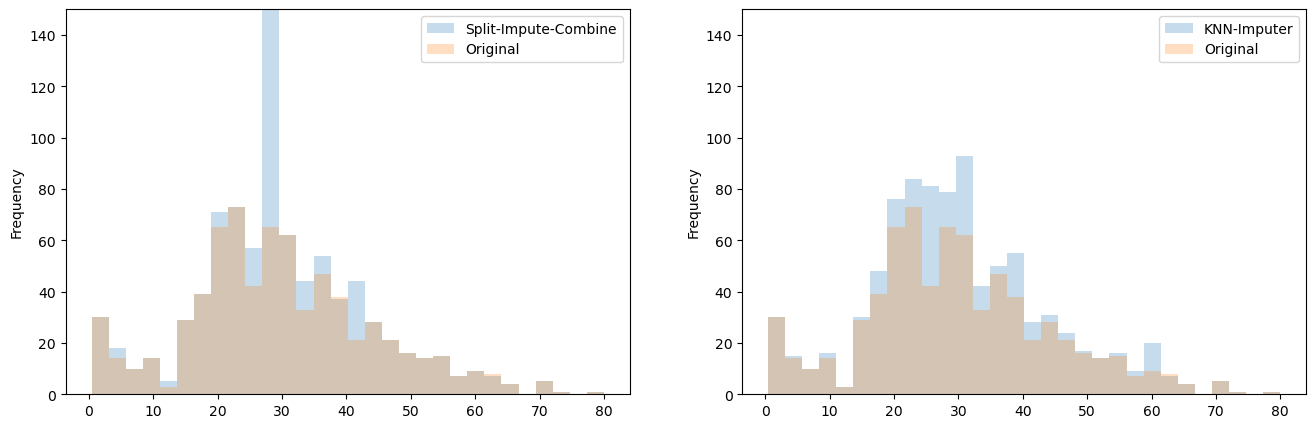

In [17]:
# let's show some very basic plotting to be sure the data looks about the same
# Which imputation did better? The Split-Apply-Combine, or Nearest Neighbor Imputer? 
f = plt.figure(figsize=(16,5))

bin_num = 30
plt.subplot(1,2,1)
df_imputed_sic.Age.plot(kind='hist', alpha=0.25, 
                        label="Split-Impute-Combine",
                        bins=bin_num)

df.Age.plot(kind='hist', alpha=0.25, 
                        label="Original",
                        bins=bin_num)
plt.legend()
plt.ylim([0, 150])

plt.subplot(1,2,2)
df_imputed.Age.plot(kind='hist', alpha=0.25, 
                        label="KNN-Imputer",
                        bins=bin_num)

df.Age.plot(kind='hist', alpha=0.25, 
                        label="Original",
                        bins=bin_num)
plt.legend()
plt.ylim([0, 150])

plt.show()